In [301]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

pd.set_option('display.max_columns', 500)
sns.set()

In [302]:
df = pd.read_csv('ugse.csv')

df.columns = df.iloc[0]
df.rename(columns={ df.columns[2]: "permission" }, inplace = True)
df = df[2:]

cols = df.columns

df = df[df[cols[0]]  == '100']
df = df[df[cols[2]]  == 'I agree']
df = df[df[cols[3]]  != 'No - I\'ve never worked']

df.drop(df.columns[[0,1,2,3]], axis=1, inplace=True)

cols = df.columns

# They did not complete: 20, 110, 111, 127
df.drop([20,110,111,127], inplace=True)

# Some null values of Q7-Q15
df[cols[7:16]] = df[cols[7:16]].fillna('Neither agree nor disagree')

# df.reset_index(drop=True, inplace=True)

In [303]:
df

,Please provide your undergraduate University name,What is your gender?,What is your highest level of degree or education? - Selected Choice,Which year did you complete your undergraduate or bachelors degree?,How many years of industry experience do you have?,What is your current job description? - Selected Choice,Do you think the current curricula/syllabus for the undergraduate software engineering courses are s - Selected Choice,"Rate your undergraduate projects (course projects or final year project) for the following criteria: - Used standard software development tools (e.g., version control systems)","Rate your undergraduate projects (course projects or final year project) for the following criteria: - Used software development frameworks (e.g., Spring, Django etc.)",Rate your undergraduate projects (course projects or final year project) for the following criteria: - Used software development life cycles (SDLC),Rate your undergraduate projects (course projects or final year project) for the following criteria: - Performed requirements analysis,"Rate your undergraduate projects (course projects or final year project) for the following criteria: - Applied different software testings (e.g., unit testing etc.)",Rate your undergraduate projects (course projects or final year project) for the following criteria: - Used project management tools,Rate your undergraduate projects (course projects or final year project) for the following criteria: - Used bug tracking systems,Rate your undergraduate projects (course projects or final year project) for the following criteria: - Were similar to real-life projects,Rate your undergraduate projects (course projects or final year project) for the following criteria: - Were evaluated properly,Internship should be made mandatory as part of the curricula or degree requirement. - Selected Choice,How extensively did you participate in programming contests or solve ACM problems? - Selected Choice,Programming contests or solving ACM problems help build software development skills. - Selected Choice,What do you think about the people who participate in programming contests or solve ACM problems? - Selected Choice,"Undergraduate course projects should be given more time. That is, they should span or continue multiple semesters or years. - Selected Choice",Software engineering course instructors should have industry experience. - Selected Choice,"Universities should teach communication and other ""soft"" skills. - Selected Choice","After your graduation, how much effort did you have to put to become effective (i.e., get up to speed) in your role at work? - Selected Choice",How helpful was your undergrad team projects experience for your current job? - Selected Choice,"After I joined the team, my company provided formal training (e.g., on-boarding, orientation etc.) on the code base, tools and/or processes. - Selected Choice","Based on your own experience, how much do you think the current undergraduate education prepares an individual for the software industry? - Selected Choice",Both male and female graduates receive equal opportunity at the time of recruitment. - Selected Choice,The workplace environment of the software/IT industry is more comfortable for a man than a woman. - Selected Choice
2,Shahjalal University of Science and Technology,Male,Ph.D.,2014,2 to 5 years,Other (please specify),Strongly disagree - should be totally changed,Somewhat disagree,Somewhat disagree,Somewhat disagree,Somewhat agree,Strongly disagree,Somewhat agree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly agree,Solved a few,Somewhat agree,Hard to work with,Neither agree nor disagree,Strongly agree,Strongly agree,A moderate amount,Not helpful at all,Strongly disagree,A little,Other (I want to share my opinion),Somewhat agree
3,University of Dhaka (DU),Male,"Masters, M.Sc., MS",2010,5 to 10 years,Software Developer/Engineer,Agree - minor changes are needed,Strongly disagree,Strongly disagree,Strongly disa

#

### 0. Please provide your undergraduate University name

In [334]:
df.groupby(cols[0]).size() #.plot(kind='bar')
# sns.countplot(df[cols[0]], color='gray')

Please provide your undergraduate University name
Ahsanullah University of Science and Technology              2
American International University-Bangladesh                 3
BRAC University                                              1
Bangladesh University                                        2
Bangladesh University of Business and Technology             1
Bangladesh University of Engineering & Technology (BUET)    40
Canadian University of Bangladesh                            1
Chittagong Independent University                            1
Chittagong University of Engineering & Technology            1
Comilla University                                           1
Daffodil International University                            5
East West University                                         2
Green University of Bangladesh                               1
Hajee Mohammad Danesh Science & Technology University        1
International Islamic University, Chittagong                 2
Jagan

### 1. What is your gender?

Text(0, 0.5, '')

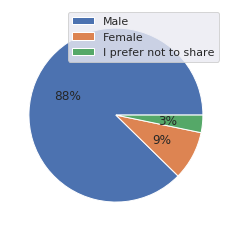

In [352]:
df1 = df.groupby(cols[1]).size()
df1 = df1[['Male', 'Female', 'I prefer not to share']]
df1.plot(kind='pie', autopct='%1.0f%%',  labels=['','',''])
plt.legend(['Male', 'Female', 'I prefer not to share'])
plt.ylabel('')

### 2. What is your highest level of degree or education?

Text(0.5, 0, '')

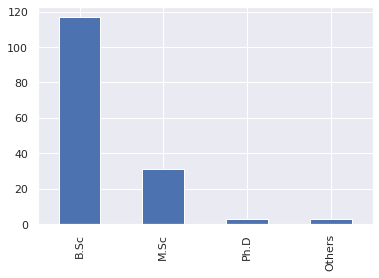

In [365]:
df1 = df.groupby(cols[2]).size()
df1.head()

di = {'Bachelors, B.Sc., BS':'B.Sc',
      'Masters, M.Sc., MS':'M.Sc', 
      'Other (please specify)':'Ph.D',
      'Ph.D.': 'Others'
     }

df1 = df1.rename(index=di)
df1.plot(kind='bar')
plt.xlabel('')

### 3. Which year did you complete your undergraduate or bachelors degree?

In [ ]:
df.groupby(cols[3]).size().plot(kind='bar')

### 4. How many years of industry experience do you have?

### 5. What is your current job description?

### 6. Do you think the current curricula/syllabus for the undergraduate software engineering courses are s - Selected Choice

### 7-15 Rate your undergraduate projects (course projects or final year project) for the following criteria: - 
- 7.  Used standard software development tools (e.g., version control systems)
- 8.  Used software development frameworks (e.g., Spring, Django etc.)
- 9. Used software development life cycles (SDLC)	
- 10. Performed requirements analysis
- 11. Applied different software testings (e.g., unit testing etc.)
- 12. Used project management tools
- 13. Used bug tracking systems
- 14. Were similar to real-life projects
- 15. Were evaluated properly

<Figure size 432x288 with 0 Axes>

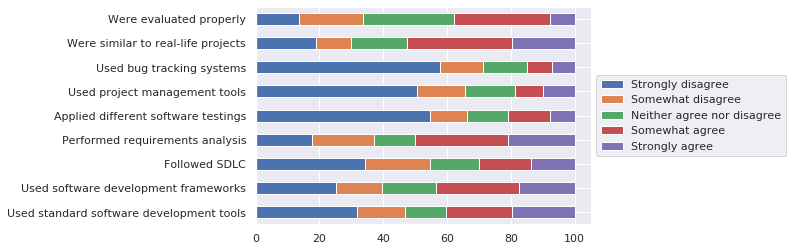

In [323]:
# for i in range (7, 16):
#     print(i, df[cols[i]].unique())

df1 = df[cols[7:16]].apply(pd.Series.value_counts)
df1 = df1/df1.sum()*100


df1.columns = ['Used standard software development tools',
               'Used software development frameworks',
               'Followed SDLC',
              'Performed requirements analysis',
              'Applied different software testings',
              'Used project management tools',
              'Used bug tracking systems',
              'Were similar to real-life projects',
              'Were evaluated properly']

df1 = df1.T
df1 = df1[['Strongly disagree', 'Somewhat disagree', 'Neither agree nor disagree',
          'Somewhat agree', 'Strongly agree']]

plt.figure()
df1.plot(kind='barh', stacked=True)
plt.legend(loc='center right', bbox_to_anchor=(1.6, 0.5))

### 16. Internship should be made mandatory as part of the curricula or degree requirement. - Selected Choice
### 17. How extensively did you participate in programming contests or solve ACM problems? - Selected Choice
### 18. Programming contests or solving ACM problems help build software development skills. - Selected Choice
### 19. Undergraduate course projects should be given more time. That is, they should span or continue multiple semesters or years. - Selected Choice
### 20. Undergraduate course projects should be given more time. That is, they should span or continue multiple semesters or years. - Selected Choice
### 21. Software engineering course instructors should have industry experience. - Selected Choice
### 22. Universities should teach communication and other "soft" skills. - Selected Choice
### 23. After your graduation, how much effort did you have to put to become effective (i.e., get up to speed) in your role at work? - Selected Choice
### 24. How helpful was your undergrad team projects experience for your current job? - Selected Choice
### 25. After I joined the team, my company provided formal training (e.g., on-boarding, orientation etc.) on the code base, tools and/or processes. - Selected Choice
### 26. Based on your own experience, how much do you think the current undergraduate education prepares an individual for the software industry? - Selected Choice
### 27. Both male and female graduates receive equal opportunity at the time of recruitment. - Selected Choice
### 28. The workplace environment of the software/IT industry is more comfortable for a man than a woman. - Selected Choice

In [178]:
for i in range (16, 29):
    print(df[cols[i]].unique())

['Strongly agree' 'Somewhat agree' 'Somewhat disagree'
 'Neither agree nor disagree' 'Other (I want to share my opinion)'
 'Strongly disagree' nan]
['Solved a few' 'A lot' 'Did not participate or solve'
 'Other (I want to share my opinion)' nan]
['Somewhat agree' 'Strongly agree' 'Somewhat disagree'
 'Neither agree nor disagree' 'Strongly disagree' nan
 'Other (I want to share my opinion)']
['Hard to work with' 'Easy to work with' 'Great team players'
 'I did not have such teammates' 'Extremely hard to work with'
 'Other (I want to share my opinion)' nan]
['Neither agree nor disagree' 'Somewhat disagree' 'Somewhat agree'
 'Strongly disagree' 'Strongly agree' 'Other (I want to share my opinion)'
 nan]
['Strongly agree' 'Neither agree nor disagree' 'Somewhat disagree'
 'Somewhat agree' 'Strongly disagree' nan
 'Other (I want to share my opinion)']
['Strongly agree' 'Somewhat agree' 'Somewhat disagree'
 'Neither agree nor disagree' 'Strongly disagree'
 'Other (I want to share my opinion)'